In [ ]:
ATIVIDADE 

O Secretário de Segurança Pública solicitou uma análise a fim de saber, se há relação entre lesões dolosas e lesões com morte. 
Se isto pode ser observado com base nos dados históricos. Se sim, ele pede p/ estimar, de alguma forma, quantas lesões com morte podem ser previstas, 
quando as lesões dolosas forem em torno de 40.000, 50.000 e 60.000 em 3 meses.  

Isto norteará uma nova estratégia de segurança para o estado. 

 

 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ENDERECO_DADOS = 'https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv'

# obtendo os dados

try:
    print("Baixando os dados...")
    df_ocorrencias = pd.read_csv(ENDERECO_DADOS, sep=';', encoding='iso-8859-1')

    print(df_ocorrencias.head())
except Exception as e:
    print(f'Erro ao baixar os dados: {e}')
    exit()

Baixando os dados...
   cisp  mes   ano  mes_ano  aisp  risp           munic    mcirc   regiao  \
0     1    1  2003  2003m01     5     1  Rio de Janeiro  3304557  Capital   
1     4    1  2003  2003m01     5     1  Rio de Janeiro  3304557  Capital   
2     5    1  2003  2003m01     5     1  Rio de Janeiro  3304557  Capital   
3     6    1  2003  2003m01     1     1  Rio de Janeiro  3304557  Capital   
4     7    1  2003  2003m01     1     1  Rio de Janeiro  3304557  Capital   

   hom_doloso  ...  cmp  cmba  ameaca  pessoas_desaparecidas  \
0           0  ...  NaN   NaN      21                      2   
1           3  ...  NaN   NaN      15                      6   
2           3  ...  NaN   NaN      47                      2   
3           6  ...  NaN   NaN      26                      2   
4           4  ...  NaN   NaN      10                      1   

   encontro_cadaver  encontro_ossada  pol_militares_mortos_serv  \
0                 0                0                          0 

In [2]:
# Delimitando as Variáveis e totalizando

try:
    df_lesoes = df_ocorrencias[['cisp', 'lesao_corp_dolosa', 'lesao_corp_morte']]

    # totalizando os dados
    df_total_lesoes = df_lesoes.groupby('cisp').sum(['lesao_corp_dolosa', 'lesao_corp_morte']).reset_index()
    #print(df_veiculos.head())

except Exception as e:
    print(f"Erro ao processar os dados: {e}")
    exit()

In [3]:
# Calculando a Correlação
try:
    df_total_lesoes_cut = (
        df_total_lesoes[
            df_total_lesoes['lesao_corp_dolosa'] < np.percentile(df_total_lesoes['lesao_corp_dolosa'], 99)
        ]
    )

    df_total_lesoes_cut = (
        df_total_lesoes[
            df_total_lesoes['lesao_corp_morte'] < np.percentile(df_total_lesoes['lesao_corp_morte'], 99)
        ]
    )

# Arrays
    array_lesoes_dolosa = np.array(df_total_lesoes_cut['lesao_corp_dolosa'])
    array_lesao_morte = np.array(df_total_lesoes_cut['lesao_corp_morte'])

# Calculando a orrelação
    correlacao = np.corrcoef(array_lesoes_dolosa, array_lesao_morte)[0,1]

    print(f"Correlação: {correlacao:.2f}")

except Exception as e:
    print(f"Erro ao processar os dados: {e}")
    exit()

Correlação: 0.77


In [4]:
# Aplicando o modelo de regressão linear
try:
    # pip install scikit-learn
    print('Iniciando a regressão linear...')

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        array_lesoes_dolosa,  # Variável independente
        array_lesao_morte,  # Variável dependente
        test_size=0.2,  # 80% treino, 20% teste
        random_state=42  # Para reprodutibilidade
    )

    # Normalizando os dados
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, 1))
    X_test = scaler.transform(X_test.reshape(-1, 1))

    # Treinando o modelo
    from sklearn.linear_model import LinearRegression
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)  # Treinando

    r2_score = modelo.score(X_test, y_test)  # Avaliando
    print(f"R² score: {r2_score:.2f}")

except Exception as e:
    print(f"Erro ao aplicar a regressão linear: {e}")
    exit()

Iniciando a regressão linear...
R² score: 0.52


In [7]:
# Previssão
try:
    # Array de previssões 40000, 50000, 60000
    array_lesoes_dolosa_pred = np.array([40000,50000,60000])
    
    # Normalizando os dados de entrada
    array_lesao_morte_pred_scaled = scaler.transform(array_lesoes_dolosa_pred.reshape(-1,1))

    # Fazendo previsões
    recup_pred = modelo.predict(array_lesao_morte_pred_scaled)
    print("Previsões:", recup_pred)

except Exception as e:
    print(f"Erro ao aplicar a regressão linear: {e}")
    exit()

Previsões: [21.42733167 26.47854735 31.52976303]


Avaliando o modelo de previsões...


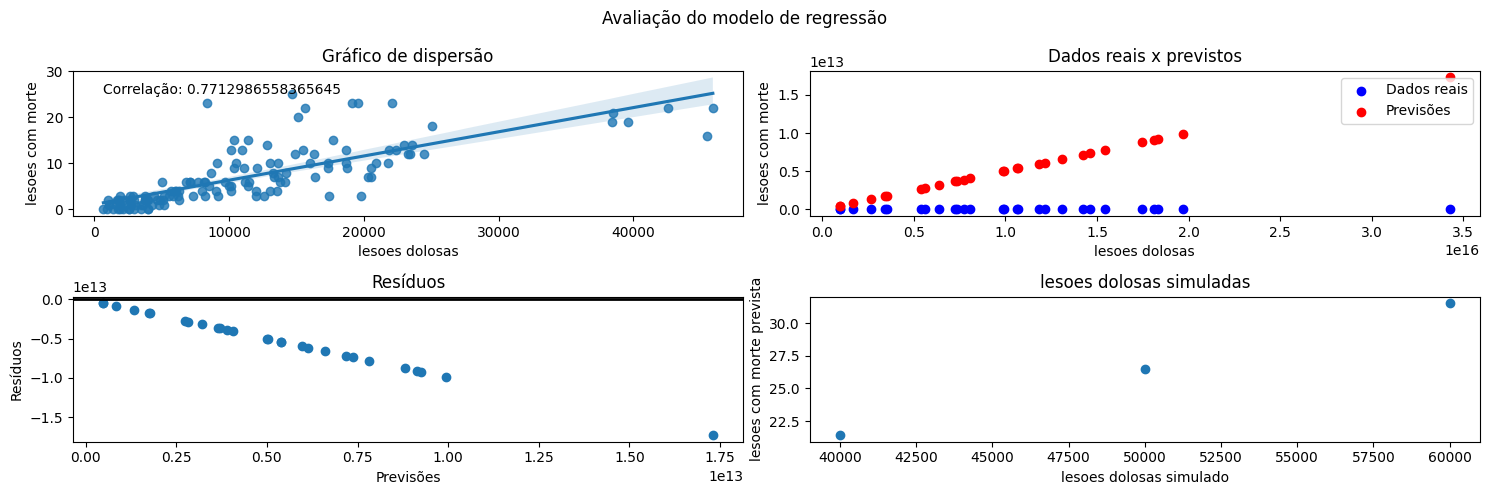

In [10]:
# AVALIANDO O MODELO

# matplotlib.use('TkAgg')

try:
    print('Avaliando o modelo de previsões...')

    plt.subplots(2, 2, figsize=(15, 5))
    plt.suptitle('Avaliação do modelo de regressão')


    #### POSIÇÃO 1: Gráfico de Dispersão entre os arrays
    # pip install seaborn
    plt.subplot(2, 2, 1)

    sns.regplot(x= array_lesoes_dolosa, y=array_lesao_morte)
    plt.title('Gráfico de dispersão')
    plt.xlabel('lesoes dolosas')
    plt.ylabel('lesoes com morte')

    # Posicionar o texto no início do gráfico
    plt.text(min(array_lesoes_dolosa),
             max(array_lesao_morte),
             f'Correlação: {correlacao}',
             fontsize=10)


    #### POSIÇÃO 2: Gráfico de dispersão entre os dados reais e previsto
    plt.subplot(2, 2, 2)

    # Testar o modelo preditivo nos dados de X_teste
    # Saída na escal original dos dados
    y_pred = modelo.predict(X_test)

    # Retornar os dados de teste para escala real
    X_test = scaler.inverse_transform(X_test)

    # Gráfico de dispersão sem a linha de regressão
    plt.scatter(X_test, y_test, color='blue', label='Dados reais')
    plt.scatter(X_test, y_pred, color = 'red', label='Previsões')

    plt.title('Dados reais x previstos')
    plt.xlabel('lesoes dolosas')
    plt.ylabel('lesoes com morte')

    plt.legend()


    ##### POSIÇÃO 3: Resíduos
    plt.subplot(2, 2, 3)

    residuos = y_test - y_pred

    # plotar em gráfico de dispersão
    plt.scatter(y_pred, residuos)

    # adicioanar uma linha constante no 0
    plt.axhline(y=0, color='black', linewidth=2)

    plt.title('Resíduos')
    plt.xlabel('Previsões')
    plt.ylabel('Resíduos')


    #### POSIÇÃO 4: Dispersão dos valores simulados
    plt.subplot(2, 2, 4)
    
    plt.scatter(array_lesoes_dolosa_pred, recup_pred)

    plt.title('lesoes dolosas simuladas')
    plt.xlabel('lesoes dolosas simulado')
    plt.ylabel('lesoes com morte prevista')

    plt.tight_layout()
    plt.show()

except ImportError as e:
    print("Erro ao avaliar o modelo: ", e)
    exit()